In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import csv
import random
import operator
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

In [345]:
split = 0.2
df=pd.read_csv('admission_data.csv')
target_mean=df['Chance of Admit '].mean()
target_min=df['Chance of Admit '].min()
target_max=df['Chance of Admit '].max()
#df=(df-df.mean())/(df.max()-df.min())
## denormalize predicted value ----> (normalized)*(max(x)-min(x))+mean(x)
Xdf=df[df.columns[[1,2,3,4,5,6,7]]]
print(type(Xdf))
ydf=df[df.columns[8]]
X=Xdf.values
X=(X-X.mean())/(X.max()-X.min())
y=ydf.values
#print(df.mean())
#print(df.max())
#print(df['CGPA'].mean())
#X=np.array([X])
#y=np.array([y])
print(X)

<class 'pandas.core.frame.DataFrame'>
[[ 0.74630586  0.1168941  -0.18016472 ... -0.18016472 -0.16207649
  -0.18604708]
 [ 0.75218822  0.13159998 -0.17722355 ... -0.17575296 -0.16092943
  -0.1831059 ]
 [ 0.76101175  0.13748233 -0.17722355 ... -0.17869414 -0.16054708
  -0.1831059 ]
 ...
 [ 0.77571763  0.14924704 -0.17722355 ... -0.17722355 -0.15951767
  -0.18604708]
 [ 0.80512939  0.16101175 -0.17428237 ... -0.17281178 -0.15766472
  -0.1831059 ]
 [ 0.73159998  0.1168941  -0.17722355 ... -0.17428237 -0.16022355
  -0.18604708]]


In [346]:
#train_df,validation_df = divide(df,validation_data_size=0.2)
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=5)

In [347]:
y_valid[2]

0.52

In [348]:
X_train.shape

(360, 7)

In [349]:
X_train=X_train.T
X_train.shape[0]

7

In [350]:
y_train.shape

(360,)

In [351]:
y_train=np.array([y_train])
y_train.shape

(1, 360)

In [352]:
X_valid=X_valid.T
X_valid.shape

(7, 90)

In [353]:
y_valid=np.array([y_valid])
y_valid.shape

(1, 90)

In [354]:
def init_parameters(lenw):
    w=np.random.randn(1,lenw)
    #w=np.zeros(1,lenw)
    #print("shape of theta vector:",w.shape)
    b=0
    return w,b
    

In [355]:
def get_prediction(X,w,b):
    z=np.dot(w,X)+b # z-->1xm
    return z

In [381]:
def cost_function(z,y):
    m= y.shape[1]
    #print('m type:',type(m))
    #print('m type:',type(z))
    #print('m type:',type(y))
    
    #mean square error
    #J = (1/(2*m))*np.sum(np.square(z-y))
    #mean absolute error
    #J = (1/(2*m))*np.sum(np.absolute(z-y))
     #mean absolute percentage error
    J = (100/(2*m))*np.sum(np.absolute((z-y)/z))
    return J

In [382]:
def get_partial_derivative_terms(X,y,z):
    m=y.shape[1]
    dz=(1/m)*(z-y)
    dw=np.dot(dz,X.T)
    db=np.sum(dz)
    return dw,db

In [383]:
def gradient_descent_update(w,b,dw,db,alpha):
    w=w-alpha*dw
    b=b-alpha*db
    return w,b

In [384]:
def linear_regression(X_train,y_train,alpha,iterations):
    lenw=X_train.shape[0]
    w,b=init_parameters(lenw)
    m_train=y_train.shape[1]
    m_valid=y_valid.shape[1]
    costs_train=[]
    for i in range(iterations+1):
        z_train=get_prediction(X_train,w,b)
        cost_train=cost_function(z_train,y_train)
        dw,db=get_partial_derivative_terms(X_train,y_train,z_train)
        w,b=gradient_descent_update(w,b,dw,db,alpha)
        print(w.shape)
        
        theta_vector=np.copy(w)
        c_value=b
        #store training_cost in list
        if i%10==0:
            costs_train.append(cost_train)
        # Mean Absolute Error
        mae_train=(1/m_train)*np.sum(np.abs(z_train-y_train))
        
        #cost_val ,mae_val on validation data
        #z_valid=get_prediction(X_valid,w,b)
        #cost_valid=cost_function(z_valid,y_valid)
        #mae_valid=(1/m_valid)*np.sum(np.abs(z_valid-y_valid))
        print('Iteration:',i)
        print('Training cost:',cost_train)
        #print('validation cost:',cost_valid)
        print('Training MAE:',mae_train)
        #print('Validation MAE:',mae_valid)
        print('------------------------------')
    mlt.plot(costs_train)
    mlt.xlabel('Iterations (In 10s)')
    mlt.ylabel('Training cost')
    mlt.title('Learning rate'+str(alpha))
    mlt.show()
    return w,b
    

(1, 7)
Iteration: 0
Training cost: 73.66508566355611
Training MAE: 2.2532941078463433
------------------------------
(1, 7)
Iteration: 1
Training cost: 76.3479791587052
Training MAE: 2.0975631437012465
------------------------------
(1, 7)
Iteration: 2
Training cost: 79.45698224731375
Training MAE: 1.9525865560916578
------------------------------
(1, 7)
Iteration: 3
Training cost: 83.09230344361762
Training MAE: 1.8176216760130717
------------------------------
(1, 7)
Iteration: 4
Training cost: 87.38801363105917
Training MAE: 1.6919771212323036
------------------------------
(1, 7)
Iteration: 5
Training cost: 92.52769920743688
Training MAE: 1.5750092545577388
------------------------------
(1, 7)
Iteration: 6
Training cost: 98.76969493971549
Training MAE: 1.466118886692127
------------------------------
(1, 7)
Iteration: 7
Training cost: 106.48952378800247
Training MAE: 1.3647482067777146
------------------------------
(1, 7)
Iteration: 8
Training cost: 116.2550157427183
Training MAE

Training MAE: 0.1152625361871673
------------------------------
(1, 7)
Iteration: 396
Training cost: 7.929600178437511
Training MAE: 0.1152588577196853
------------------------------
(1, 7)
Iteration: 397
Training cost: 7.9293453320331375
Training MAE: 0.11525517939831326
------------------------------
(1, 7)
Iteration: 398
Training cost: 7.9290904969716065
Training MAE: 0.11525150122304532
------------------------------
(1, 7)
Iteration: 399
Training cost: 7.928835673252235
Training MAE: 0.11524782319387572
------------------------------
(1, 7)
Iteration: 400
Training cost: 7.9285808608743364
Training MAE: 0.11524414531079859
------------------------------
(1, 7)
Iteration: 401
Training cost: 7.928326059837227
Training MAE: 0.11524046757380817
------------------------------
(1, 7)
Iteration: 402
Training cost: 7.928071270140217
Training MAE: 0.1152367899828986
------------------------------
(1, 7)
Iteration: 403
Training cost: 7.927816491782629
Training MAE: 0.1152331125380641
-------

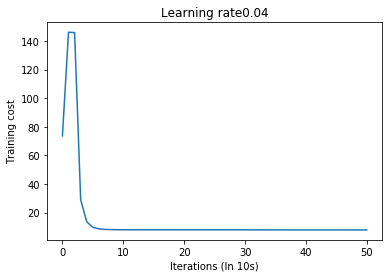

In [385]:
theta_vector,c_value=linear_regression(X_train,y_train,0.04,500)

In [386]:
print(theta_vector)
print(c_value)

[[-0.0263449  -0.43246932 -0.30764192  1.00341734  1.28285645  1.09536005
  -0.30675196]]
1.2704637051685035


In [387]:
z_valid=get_prediction(X_valid,theta_vector,c_value)
cost_valid=cost_function(z_valid,y_valid)
print(cost_valid)
#print(cost_valid)
#print(df['Chance of Admit '].max())
#print(df['Chance of Admit '].min())
#print(df['Chance of Admit '].mean())
print(type(y_valid))
for i in range(len(z_valid[0])):
    print ('predicted',z_valid[0][i])
    print('actual',y_valid[0][i])
    print('-----------')

8.21520151310851
<class 'numpy.ndarray'>
predicted 0.7335615941679456
actual 0.65
-----------
predicted 0.7277058450670668
actual 0.76
-----------
predicted 0.7219901053298606
actual 0.52
-----------
predicted 0.7221067544178805
actual 0.71
-----------
predicted 0.7278157634941023
actual 0.76
-----------
predicted 0.7265216697508594
actual 0.91
-----------
predicted 0.7421186703964197
actual 0.79
-----------
predicted 0.7285161557084111
actual 0.89
-----------
predicted 0.7251913074953058
actual 0.63
-----------
predicted 0.7187832676990992
actual 0.93
-----------
predicted 0.7192411208214814
actual 0.91
-----------
predicted 0.7225126391582919
actual 0.7
-----------
predicted 0.7298780659065831
actual 0.71
-----------
predicted 0.7335665264898052
actual 0.93
-----------
predicted 0.7342170972696525
actual 0.48
-----------
predicted 0.7250083210385709
actual 0.82
-----------
predicted 0.7205131233455254
actual 0.87
-----------
predicted 0.7321178127920479
actual 0.68
-----------
predic

In [264]:
from sklearn import linear_model as lm

In [389]:
lg=lm.LinearRegression()
model=lg.fit(X_train.T,y_train.T)
predictions=lg.predict(X_valid.T)
mean_square_val_with_model=(1/y_valid.shape[1])*np.sum(np.square((predictions-y_valid.T)/predictions))
print(mean_square_val_with_model)

0.012477625192204744


In [390]:
predictions

array([[0.5931342 ],
       [0.76636613],
       [0.75665347],
       [0.70854711],
       [0.73320831],
       [0.90966871],
       [0.77147114],
       [0.90452729],
       [0.73967237],
       [0.91421821],
       [0.93367453],
       [0.66122233],
       [0.7461218 ],
       [0.88887573],
       [0.58593687],
       [0.81037925],
       [0.84776668],
       [0.63594128],
       [0.71126538],
       [0.77620355],
       [0.72199393],
       [0.77119092],
       [0.82474404],
       [0.72522489],
       [0.88906734],
       [0.7620835 ],
       [0.59648613],
       [0.66019965],
       [0.64683865],
       [0.85791414],
       [0.6542264 ],
       [0.74331025],
       [0.87992631],
       [0.83260426],
       [0.72121272],
       [0.56279255],
       [0.56039601],
       [0.62992508],
       [0.62700499],
       [0.55009454],
       [0.51831622],
       [0.84974057],
       [0.51637143],
       [0.9618974 ],
       [0.78392172],
       [0.58615627],
       [0.85434775],
       [0.694

In [393]:
mean_square_val_with_sklearn=(1/y_valid.shape[1])*np.sum(np.square((predictions-y_valid.T)/predictions))



In [394]:
print(mean_square_val_with_sklearn)

0.012477625192204744
